In [1]:
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Global Constants
TOTAL_AF_SUPPLY = 100_000_000  # Total supply of $AF tokens
TOTAL_ALFA_SUPPLY = 60_000_000  # Total supply of $AF tokens
AF_BURNING_EMISSION_BUDGET_PERCENT = 0.05  # 5% of total supply
AF_MINING_EMISSION_BUDGET_PERCENT = 0.05  # 5% of total supply

AF_BURNING_EMISSION_BUDGET = TOTAL_AF_SUPPLY * AF_BURNING_EMISSION_BUDGET_PERCENT
BURNING_CONVERSION_RATE = AF_BURNING_EMISSION_BUDGET / TOTAL_ALFA_SUPPLY

AF_MINING_EMISSION_BUDGET = TOTAL_AF_SUPPLY * AF_MINING_EMISSION_BUDGET_PERCENT
MINING_CONVERSION_RATE = AF_MINING_EMISSION_BUDGET / (TOTAL_AF_SUPPLY - AF_MINING_EMISSION_BUDGET)

K_BURNING = 0.42
K_MINING = 0.42

In [3]:
# AlfaBurningProgram Class
class AlfaBurningProgram:
    def __init__(self):
        self.burners = {}  # Store burner info

    def burn(self, burner, burn_amount, drain_period_days):
        if self.aggregate_burns() > TOTAL_ALFA_SUPPLY:
            return
        
        if self.aggregate_emission() > AF_BURNING_EMISSION_BUDGET:
            return
        
        current_time = datetime.now()
        self.burners[burner] = {
            'burnt_amount': burn_amount,
            'drain_period': drain_period_days,
            'drain_started_at': current_time,
            'emission': EmissionRegulator.calculate_burn_emission(burn_amount, drain_period_days)
        }

    def aggregate_burns(self):
        total_burned = sum(burner_info['burnt_amount'] for burner_info in self.burners.values())
        return total_burned
    
    def aggregate_emission(self):
        return sum(burner_info['emission'] for burner_info in self.burners.values())
    

# LiquidityMiningProgram Class
class LiquidityMiningProgram:
    def __init__(self):
        self.miners = {}  # Store burner info

    def add_liquidity(self, miner, af_amount_deposited, lock_period_days):
        if self.aggregate_liquidity() > TOTAL_AF_SUPPLY:
            return
        
        if self.aggregate_emission() > AF_MINING_EMISSION_BUDGET:
            return
    
        current_time = datetime.now()
        self.miners[miner] = {
            'af_amount_deposited': af_amount_deposited,
            'lock_period': lock_period_days,
            'lock_started_at': current_time,
            'emission': EmissionRegulator.calculate_liquidity_emission(af_amount_deposited, lock_period_days)
        }

    def aggregate_liquidity(self):
        total_deposited = sum(miner_info['af_amount_deposited'] for miner_info in self.miners.values())
        return total_deposited
    
    def aggregate_emission(self):
        return sum(miner_info['emission'] for miner_info in self.miners.values())
    

# EmissionRegulator Class
class EmissionRegulator:
    def __init__(self):
        self.miners = {}  # Store burner info


    def calculate_burn_emission(burn_amount, drain_period_days):
        discount_factor = 1 / (1 - K_BURNING * drain_period_days / 366)  # Simple discount factor
        return burn_amount * BURNING_CONVERSION_RATE * discount_factor
    
    def calculate_liquidity_emission(af_amount_deposited, lock_period_days):
        discount_factor = 1 / (1 - K_MINING *lock_period_days / 366)  # Simple discount factor
        return af_amount_deposited * MINING_CONVERSION_RATE * discount_factor
    

In [4]:

# Initialize Programs
alfa_burning_program = AlfaBurningProgram()
liquidity_mining_program = LiquidityMiningProgram()
emission_regulator = EmissionRegulator()


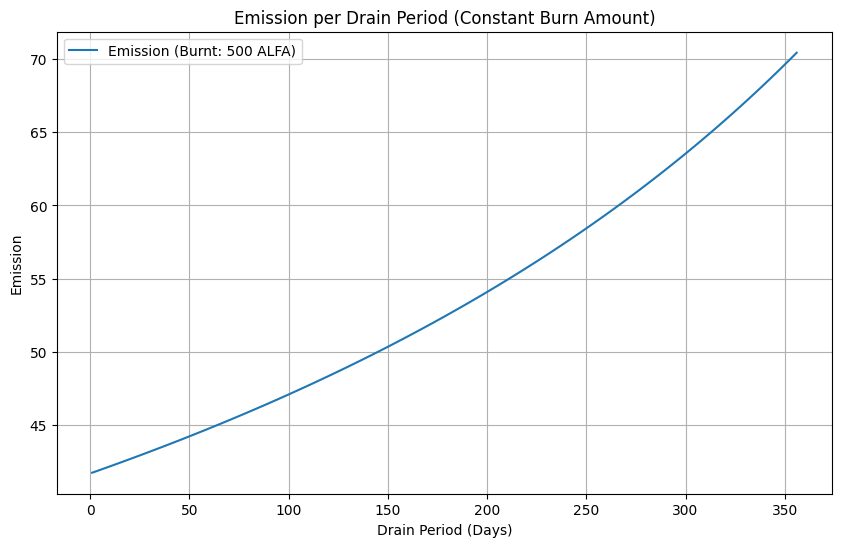

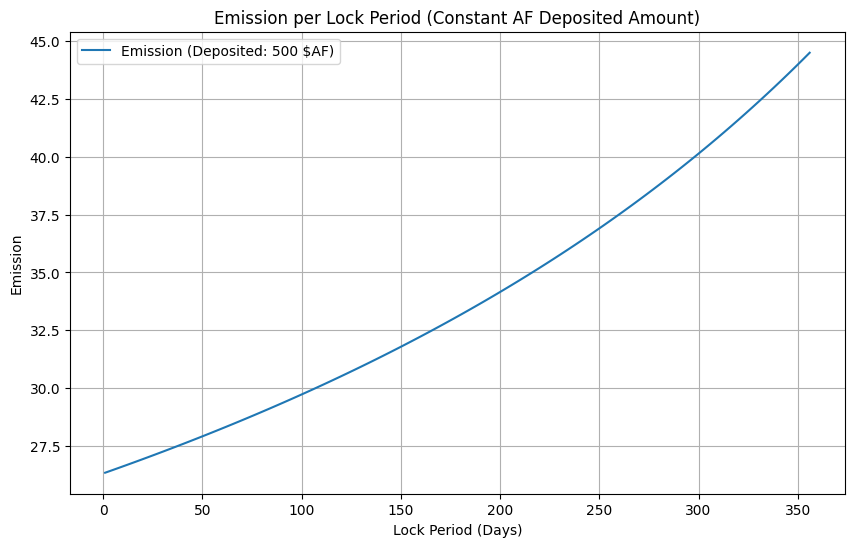

In [5]:
def plot_emission_per_drain_period_curve():
    burn_amount = 500  # Fixed burn amount
    drain_periods = np.linspace(1, 356, 100)  # Range of drain periods from 1 to 356 days

    plt.figure(figsize=(10, 6))
    # Calculate emissions for each drain period
    emissions = [EmissionRegulator.calculate_burn_emission(burn_amount, period) for period in drain_periods]
    plt.plot(drain_periods, emissions, label=f'Emission (Burnt: {burn_amount} ALFA)')

    # Plotting the emission vs. drain period

    plt.xlabel('Drain Period (Days)')
    plt.ylabel('Emission')
    plt.title('Emission per Drain Period (Constant Burn Amount)')
    plt.legend()
    plt.grid(True)
    plt.show()



# Call the function to plot
plot_emission_per_drain_period_curve()

def plot_emission_per_lock_period_curve():
    deposited_amount = 500  # Fixed burn amount
    lock_periods = np.linspace(1, 356, 100)  # Range of drain periods from 1 to 356 days

    plt.figure(figsize=(10, 6))
    # Calculate emissions for each drain period
    emissions = [EmissionRegulator.calculate_liquidity_emission(deposited_amount, period) for period in lock_periods]
    plt.plot(lock_periods, emissions, label=f'Emission (Deposited: {deposited_amount} $AF)')

    # Plotting the emission vs. drain period

    plt.xlabel('Lock Period (Days)')
    plt.ylabel('Emission')
    plt.title('Emission per Lock Period (Constant AF Deposited Amount)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function to plot
plot_emission_per_lock_period_curve()

In [6]:
# Output Observability functions

# Plotting burning emissions over time
def plot_output(timestamps, burning_emissions, mining_emissions):
    plt.figure(figsize=(12, 6))
    plt.plot(timestamps, burning_emissions, linestyle='-', color='b', label='Cumulative Burning Emission Over Time')
    plt.plot(timestamps, mining_emissions, linestyle='-', color='r', label='Cumulative Mining Emission Over Time')
    plt.xlabel('Time')
    plt.ylabel('AF Emission')
    plt.title('AF Reward Emission Over Time')
    plt.grid(True)
    plt.legend()
    plt.show()

# Plotting Circulating supply function over time
def plot_alfa_supply_output(timestamps, alfa_supply):
    plt.figure(figsize=(12, 6))
    plt.plot(timestamps, alfa_supply, linestyle='-', color='g', label='ALFA Supply')
    plt.xlabel('Time')
    plt.ylabel('Circulating ALFA Supply')
    plt.title('ALFA Supply Over Time')
    plt.grid(True)
    plt.legend()
    plt.show()

# Plotting Circulating supply function over time
def plot_af_deposited_output(timestamps, af_deposited):
    plt.figure(figsize=(12, 6))
    plt.plot(timestamps, af_deposited, linestyle='-', color='g', label='AF Deposited Over Time')
    plt.xlabel('Time')
    plt.ylabel('AF Deposited')
    plt.title('AF Deposited Over Time')
    plt.grid(True)
    plt.legend()
    plt.show()

# Print Average
def calculateAverage(lst): 
    return sum(lst) / len(lst)


In [7]:
# Scenario generation function

# Burning
def generate_burning_scenarios(alfa_burn_program, num_burn_events, max_burn_amount, max_drain_period, total_days):
    # Initialize the scenario results
    alfa_supply_over_time = []
    emissions_over_time = []
    timestamps = []

    burn_amounts = []
    drain_periods = []
    
    # Define start time
    start_time = datetime.today()

    for i in range(num_burn_events):
        # Generate random burn data
        burner_name = f"burner_{i + 1}"
        burn_amount = random.randint(10, max_burn_amount)  # Random burn amount
        drain_period = random.randint(0, max_drain_period)  # Random drain period
        # drain_period = 0  # Random drain period

        burn_amounts.append(burn_amount)
        drain_periods.append(drain_period)

        # Apply the burn event
        alfa_burn_program.burn(burner_name, burn_amount, drain_period)

        # Record the total emission and timestamp after the burn
        current_time = start_time + timedelta(days=(i * total_days / num_burn_events))
        timestamps.append(current_time)
        emissions_over_time.append(alfa_burn_program.aggregate_emission())
        alfa_supply_over_time.append(TOTAL_ALFA_SUPPLY - alfa_burn_program.aggregate_burns())

    print("Average Burn Amount :", calculateAverage(burn_amounts))
    print("Average Drain Period :", calculateAverage(drain_periods))

    return timestamps, emissions_over_time, alfa_supply_over_time

# Mining 
def generate_mining_scenarios(liquidity_mining_program, num_deposit_events, max_deposit_amount, max_lock_period, total_days):
    # Initialize the scenario results
    af_deposited_over_time = []
    emissions_over_time = []
    timestamps = []

    deposit_amounts = []
    lock_periods = []
    
    # Define start time
    start_time = datetime.today()

    for i in range(num_deposit_events):
        # Generate random burn data
        miner_name = f"miner_{i + 1}"
        deposit_amount = random.randint(10, max_deposit_amount)  # Random deposit amount
        lock_period = random.randint(0, max_lock_period)  # Random lock period

        deposit_amounts.append(deposit_amount)
        lock_periods.append(lock_period)

        # Apply the burn event
        liquidity_mining_program.add_liquidity(miner_name, deposit_amount, lock_period)

        # Record the total emission and timestamp after the deposit
        current_time = start_time + timedelta(days=(i * total_days / num_deposit_events))
        timestamps.append(current_time)
        emissions_over_time.append(liquidity_mining_program.aggregate_emission())
        af_deposited_over_time.append(liquidity_mining_program.aggregate_liquidity())

    print("Average Deposited Amount :", calculateAverage(deposit_amounts))
    print("Average Lock Period :", calculateAverage(lock_periods))

    return timestamps, emissions_over_time, af_deposited_over_time

Average Burn Amount : 2509.7091
Average Drain Period : 182.814
Average Deposited Amount : 2538.3159
Average Lock Period : 180.8909


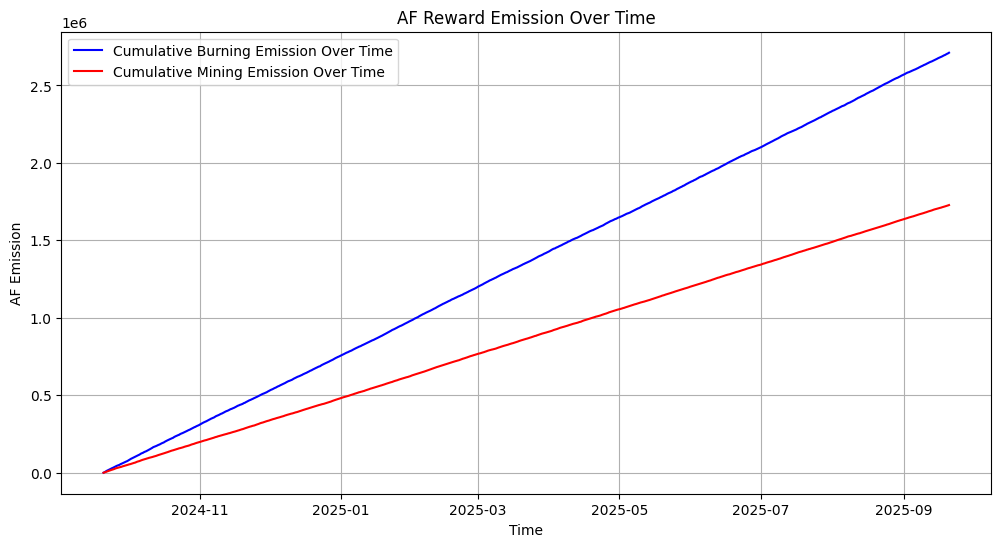

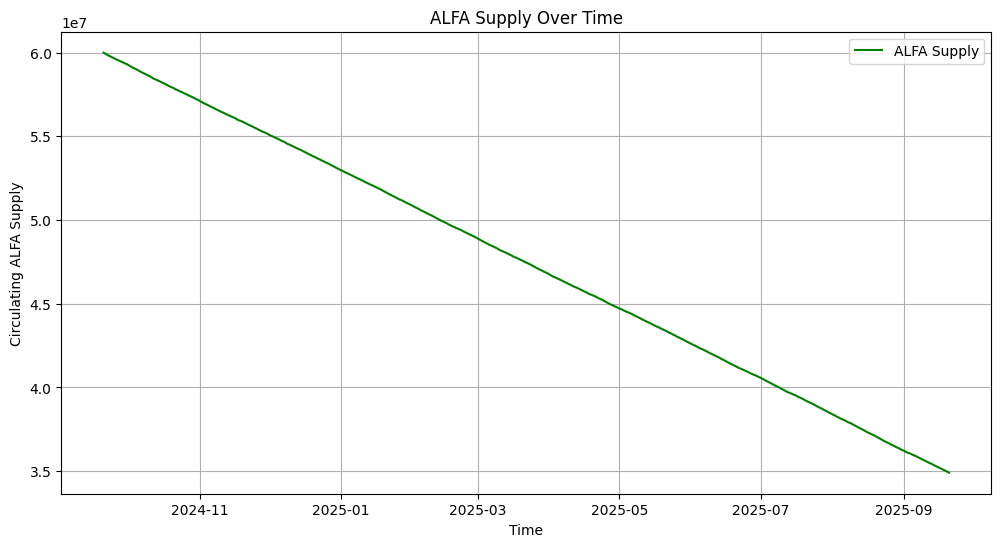

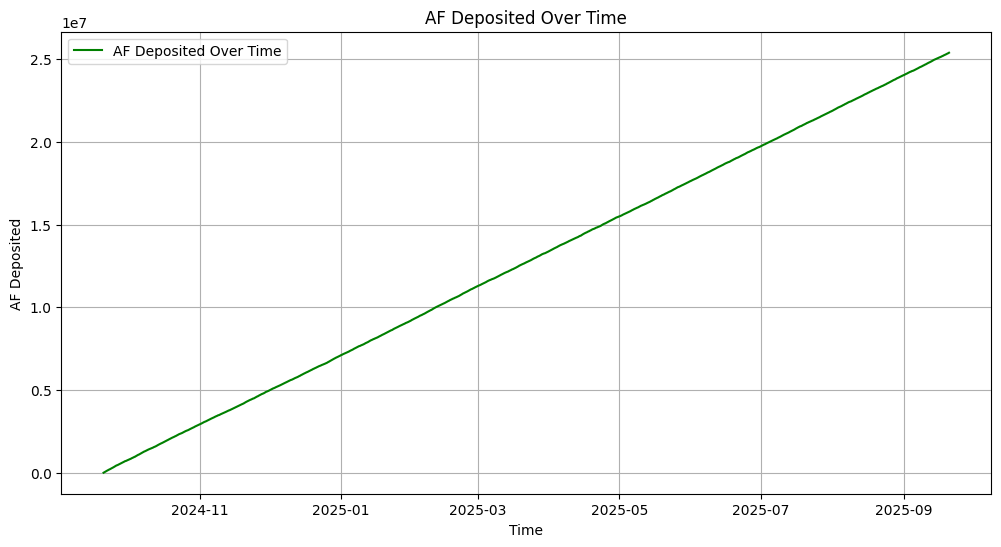

In [8]:
# Scenario Variables :
num_burn_events=10000
num_deposit_events=10000

max_burn_amount=5000
max_deposit_amount=5000

max_drain_period=365
max_lock_period=365

total_days=365

# Generate scenarios
timestamps, burning_emissions, alfa_supply = generate_burning_scenarios(alfa_burning_program, num_burn_events, max_burn_amount, max_drain_period, total_days)
timestamps, mining_emissions, af_deposited = generate_mining_scenarios(liquidity_mining_program, num_deposit_events, max_deposit_amount, max_lock_period, total_days)

# Plot emissions over time
plot_output(timestamps, burning_emissions, mining_emissions)
plot_alfa_supply_output(timestamps, alfa_supply)
plot_af_deposited_output(timestamps, af_deposited)

